<a href="https://colab.research.google.com/github/dphi-official/Datathons/blob/master/Top_Notebook_Submissions/Data_Sprint/Data_Sprint_9/Rank_5_Riya_Dhama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Riya Dhama 

# <a href="https://dphi.tech/practice/challenge/38"> Data Sprint #9 : Credit Risk </a>

<h1 align='center'> Credit Risk </h1>

### Context: 
Credit risks refer to the risks of loss on a debt that occurs when the borrower fails to repay the principal and related interest amounts of a loan back to the lender on due dates.

When a bank receives a loan application, based on the applicant’s profile the bank has to make a decision for its approval or rejection. There are two types of risks associated with this decision:

- If the applicant has good credit risk, i.e. is likely to repay the loan, then rejecting the loan results in a loss to the bank
- If the applicant has bad credit risk, i.e. is unlikely to repay the loan, then approving the loan results in a loss to the bank

### Problem Statement:
Imagine a bank in your locality. The bank has realized that applying data science methodologies can help them focus their resources efficiently, make smarter decisions on credit risk calculations, and improve performance.

Earlier they used to check the credit risk of the loan applicants manually by analyzing their bank-related data, which used to take months of time. But this time they want a smart data scientist who can automate this process.


### Objective: 
You are required to build a machine learning model that helps you predict the credit risk of the loan applicants.


### Evaluation Criteria
Submissions are evaluated using Accuracy Score.


### Acknowledgement
This data has been sourced from the UCI Machine Learning Repository.

<hr>

### Importing Essential libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score

### Loading Training Dataset

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/credit_risk/training_set_labels.csv")
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'no checking',18,'critical/other existing credit',radio/tv,1800,'<100','1<=X<4',4,'male single',none,...,car,24,none,own,2,skilled,1,none,yes,good
1,'<0',24,'existing paid',radio/tv,2439,'<100','<1',4,'female div/dep/mar',none,...,'real estate',35,none,own,1,skilled,1,yes,yes,bad
2,'no checking',36,'no credits/all paid',repairs,2613,'<100','1<=X<4',4,'male single',none,...,car,27,none,own,2,skilled,1,none,yes,good
3,'no checking',15,'existing paid',education,4623,'100<=X<500','1<=X<4',3,'male single',none,...,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,bad
4,'<0',21,'existing paid',furniture/equipment,3599,'<100','4<=X<7',1,'female div/dep/mar',none,...,car,26,none,rent,1,'unskilled resident',1,none,yes,good


### Inspeecting Data

In [ ]:
df.shape

(800, 21)

- Training Dataset comprises 800 observations(rows) and 21 features(columns).
- Out of the 21, one is the target variable and rest 20 are input variables.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         800 non-null    object
 1   duration                800 non-null    int64 
 2   credit_history          800 non-null    object
 3   purpose                 800 non-null    object
 4   credit_amount           800 non-null    int64 
 5   savings_status          800 non-null    object
 6   employment              800 non-null    object
 7   installment_commitment  800 non-null    int64 
 8   personal_status         800 non-null    object
 9   other_parties           800 non-null    object
 10  residence_since         800 non-null    int64 
 11  property_magnitude      800 non-null    object
 12  age                     800 non-null    int64 
 13  other_payment_plans     800 non-null    object
 14  housing                 800 non-null    object
 15  existi

- The data has 7 integer and 14 object attributes.
- There are No missing values

### Statistical Summary
- Get a Statistical Overview using Describe

In [ ]:
df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,21.031250,3337.878750,2.945000,2.878750,35.631250,1.410000,1.142500
std,12.171502,2866.828413,1.118498,1.092264,11.757682,0.574293,0.349781
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1364.000000,2.000000,2.000000,26.000000,1.000000,1.000000
50%,18.000000,2332.000000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,4166.000000,4.000000,4.000000,42.000000,2.000000,1.000000
max,60.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


- The attributes duration, credit_amount, age has large difference in their 75% and maximum values that is there are some outliers in data
- There is huge variation in mean and median of credit amount, ie mean is affected by presence of outliers

### Exploratory Data Analysis

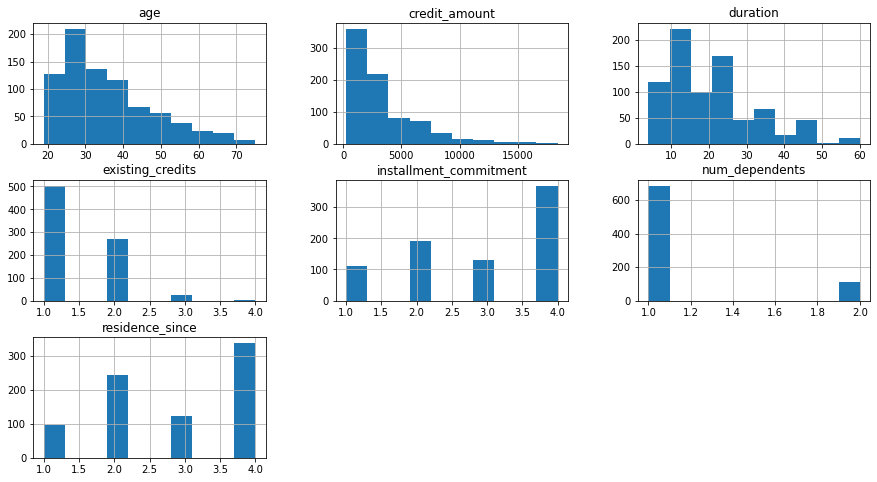

In [ ]:
df.hist(figsize=(15,8));

- Attributes age, credit_amount, duration is positevely skewed ie, they are shifted towards left
- rest all the columns are discrete 
- existing_credits have very less number of values in 3 and 4 cateegory
- num_dependents have most of the observations value as 1

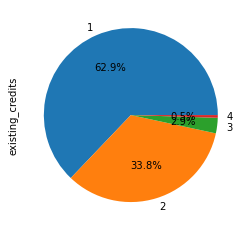

In [ ]:
df['existing_credits'].value_counts().plot(kind='pie', autopct='%1.1f%%')

- I will merge the category 3 and 4 and make it 3. 
- This will be done in pre-processing steps

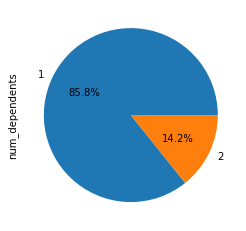

In [ ]:
df['num_dependents'].value_counts().plot(kind='pie', autopct='%1.1f%%')

- num_dependent seems to be biased towards category 1.
- This may be irrelevent towards prediction Loan should be approved or not

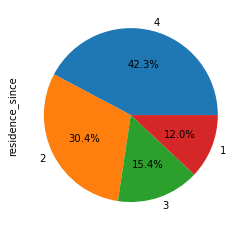

In [ ]:
df['residence_since'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [ ]:
df['checking_status'].value_counts()

'no checking'    308
'<0'             225
'0<=X<200'       216
'>=200'           51
Name: checking_status, dtype: int64

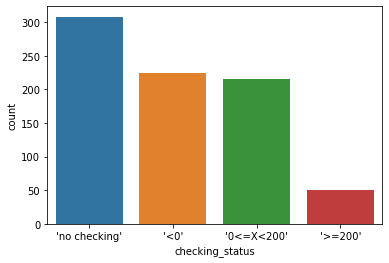

In [ ]:
sns.countplot(df['checking_status']);

In [ ]:
df['credit_history'].value_counts()

'existing paid'                     412
'critical/other existing credit'    243
'delayed previously'                 74
'all paid'                           40
'no credits/all paid'                31
Name: credit_history, dtype: int64

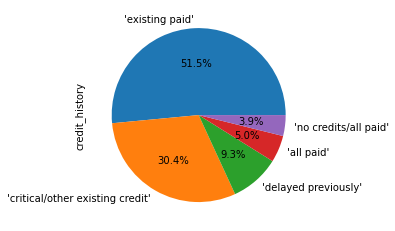

In [ ]:
df['credit_history'].value_counts().plot(kind='pie', autopct='%1.1f%%')

- As we can see all paid and no credits/all paid have least amount of observations, so I will combine them to a single category named all paid
- This is done in Task3: preprocessing

In [ ]:
df['purpose'].value_counts()

radio/tv                215
'new car'               180
furniture/equipment     148
business                 84
'used car'               83
education                42
repairs                  18
other                    12
'domestic appliance'     10
retraining                8
Name: purpose, dtype: int64

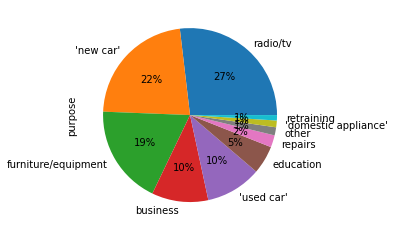

In [ ]:
df['purpose'].value_counts().plot(kind='pie',autopct = "%1.0f%%")

- Put all lowest occuring category to category named others
- This is done in task3: preprocessing

In [ ]:
df['savings_status'].value_counts()

'<100'                476
'no known savings'    145
'100<=X<500'           87
'500<=X<1000'          52
'>=1000'               40
Name: savings_status, dtype: int64

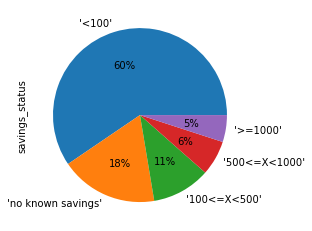

In [ ]:
df['savings_status'].value_counts().plot(kind='pie',autopct = "%1.0f%%")

In [ ]:
df['employment'].value_counts()

'1<=X<4'      263
'>=7'         204
'4<=X<7'      142
'<1'          139
unemployed     52
Name: employment, dtype: int64

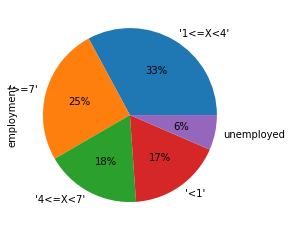

In [ ]:
df['employment'].value_counts().plot(kind='pie',autopct = "%1.0f%%")

In [ ]:
df['personal_status'].value_counts()

'male single'           429
'female div/dep/mar'    252
'male mar/wid'           74
'male div/sep'           45
Name: personal_status, dtype: int64

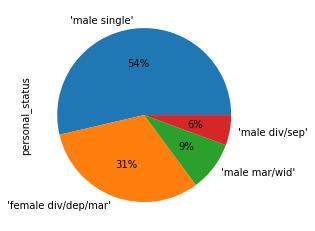

In [ ]:
df['personal_status'].value_counts().plot(kind='pie',autopct = "%1.0f%%")

- This may be irrelevent as personal status may not affect the loan application should be rejected or approved

In [ ]:
df['other_parties'].value_counts()

none              726
guarantor          39
'co applicant'     35
Name: other_parties, dtype: int64

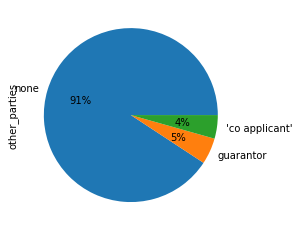

In [ ]:
df['other_parties'].value_counts().plot(kind='pie',autopct = "%1.0f%%")

- Model will be biased as most of the observations have none values

In [ ]:
df['property_magnitude'].value_counts()

car                    261
'real estate'          226
'life insurance'       190
'no known property'    123
Name: property_magnitude, dtype: int64

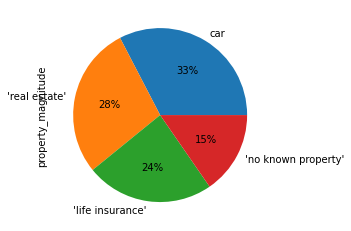

In [ ]:
df['property_magnitude'].value_counts().plot(kind='pie',autopct = "%1.0f%%")

In [ ]:
df['other_payment_plans'].value_counts()

none      649
bank      112
stores     39
Name: other_payment_plans, dtype: int64

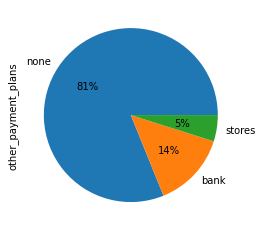

In [ ]:
df['other_payment_plans'].value_counts().plot(kind='pie',autopct = "%1.0f%%")

- This column is also seems to be irrelevent for prediction loan application to be approved or not

In [ ]:
df['housing'].value_counts()

own           565
rent          149
'for free'     86
Name: housing, dtype: int64

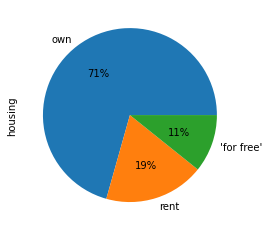

In [ ]:
df['housing'].value_counts().plot(kind='pie',autopct = "%1.0f%%")

In [ ]:
df['job'].value_counts()

skilled                        507
'unskilled resident'           154
'high qualif/self emp/mgmt'    120
'unemp/unskilled non res'       19
Name: job, dtype: int64

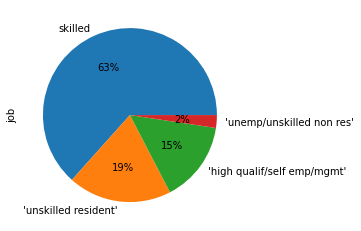

In [ ]:
df['job'].value_counts().plot(kind='pie',autopct = "%1.0f%%")

In [ ]:
df['own_telephone'].value_counts()

none    476
yes     324
Name: own_telephone, dtype: int64

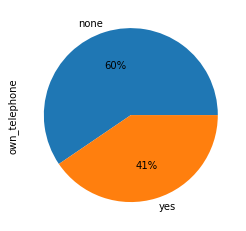

In [ ]:
df['own_telephone'].value_counts().plot(kind='pie',autopct = "%1.0f%%")

- The own telephone attribute seems to be irrelevent for prediction loan application to be approved or not

In [ ]:
df['foreign_worker'].value_counts()

yes    772
no      28
Name: foreign_worker, dtype: int64

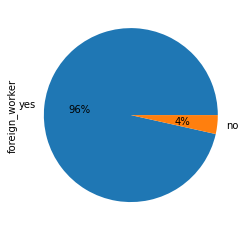

In [ ]:
df['foreign_worker'].value_counts().plot(kind='pie',autopct = "%1.0f%%")

- Highly Imbalanced attribute
- It doesn't make any contribution in prediction approval of loan application

### Target variable

In [ ]:
df['class'].value_counts()

good    560
bad     240
Name: class, dtype: int64

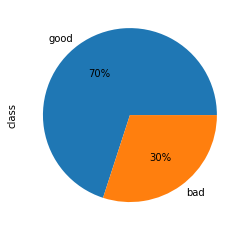

In [ ]:
df['class'].value_counts().plot(kind='pie',autopct = "%1.0f%%")

### Coorelation matrix

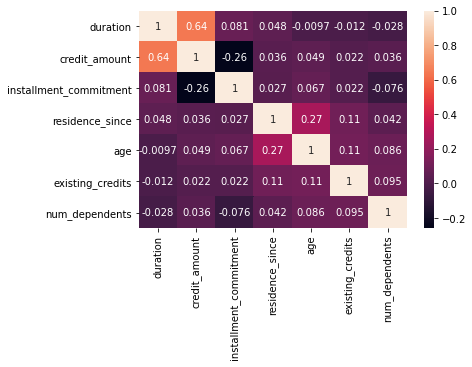

In [ ]:
sns.heatmap(df.corr(), annot=True)

### Data-preprocessing

In [ ]:
df.head(2)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'no checking',18,'critical/other existing credit',radio/tv,1800,'<100','1<=X<4',4,'male single',none,...,car,24,none,own,2,skilled,1,none,yes,good
1,'<0',24,'existing paid',radio/tv,2439,'<100','<1',4,'female div/dep/mar',none,...,'real estate',35,none,own,1,skilled,1,yes,yes,bad


In [ ]:
data = df.copy()

#### Log transformation of skewed data 

In [ ]:
data['credit_amount'] = np.log(data['credit_amount'])
data['duration'] = np.log(data['duration'])
data['age'] = np.log(data['age'])

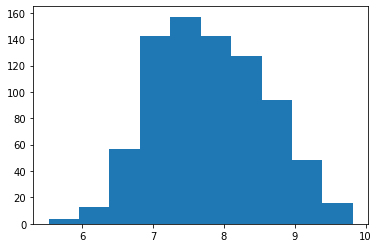

In [ ]:
plt.hist(np.log(df['credit_amount']));

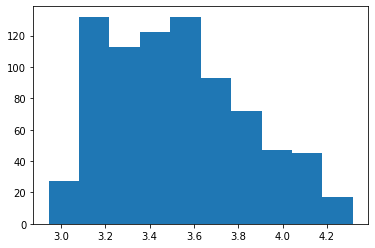

In [ ]:
plt.hist(np.log(df['age']));

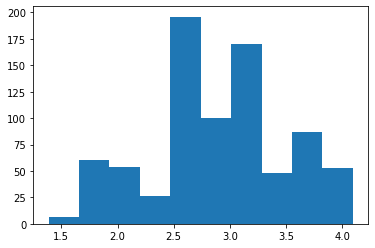

In [ ]:
plt.hist(np.log(df['duration']));

- Now all the observations are normally distributed

#### Merging lowest occuring categories into single category 

In [ ]:
credit = ["'no credits/all paid'"]
for i in credit:
    data['credit_history'] = np.where(data['credit_history']==i, "'all paid'" , data['credit_history'])

In [ ]:
data['credit_history'].value_counts()

'existing paid'                     412
'critical/other existing credit'    243
'delayed previously'                 74
'all paid'                           71
Name: credit_history, dtype: int64

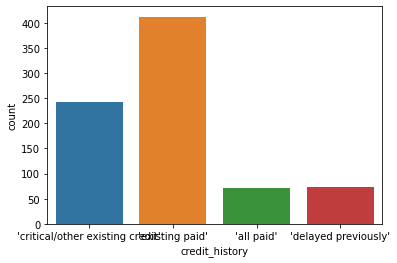

In [ ]:
sns.countplot(data.credit_history);

- Now all things are sorted in credit history column

In [ ]:
credit = [3,4]
for i in credit:
    data['existing_credits'] = np.where(data['existing_credits']==i,3 , data['existing_credits'])

In [ ]:
data['existing_credits'].value_counts()

1    503
2    270
3     27
Name: existing_credits, dtype: int64

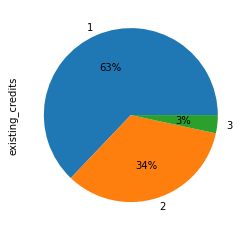

In [ ]:
data['existing_credits'].value_counts().plot(kind='pie',autopct = "%1.0f%%")

- Merged 3 and 4 categories together

In [ ]:
purpose_list = ['repairs',"'domestic appliance'", 'retraining']
for i in purpose_list:
    data['purpose'] = np.where(data['purpose']==i, 'other', data['purpose'])

In [ ]:
data['purpose'].value_counts()

radio/tv               215
'new car'              180
furniture/equipment    148
business                84
'used car'              83
other                   48
education               42
Name: purpose, dtype: int64

- all the lowest occuring purpose have been added to others category

### Dropping out Irrelevent columns

In [ ]:
data = data.drop(['other_parties','other_payment_plans', 'personal_status', 'residence_since',
                  'own_telephone', 'foreign_worker', 'num_dependents'], axis=1)
data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,property_magnitude,age,housing,existing_credits,job,class
0,'no checking',2.890372,'critical/other existing credit',radio/tv,7.495542,'<100','1<=X<4',4,car,3.178054,own,2,skilled,good
1,'<0',3.178054,'existing paid',radio/tv,7.799343,'<100','<1',4,'real estate',3.555348,own,1,skilled,bad
2,'no checking',3.583519,'all paid',other,7.868254,'<100','1<=X<4',4,car,3.295837,own,2,skilled,good
3,'no checking',2.708050,'existing paid',education,8.438799,'100<=X<500','1<=X<4',3,'life insurance',3.688879,own,1,'high qualif/self emp/mgmt',bad
4,'<0',3.044522,'existing paid',furniture/equipment,8.188411,'<100','4<=X<7',1,car,3.258097,rent,1,'unskilled resident',good


In [ ]:
print("Shape of Data before pre-processing: ", df.shape)
print("Shape of Data after pre-processing: ", data.shape)

Shape of Data before pre-processing:  (800, 21)
Shape of Data after pre-processing:  (800, 14)


### Spliting Data into X(independent variables) and y (dependent variable)

In [ ]:
x = data.drop('class', axis=1)
x.shape

(800, 13)

In [ ]:
y = data['class']
y.shape

(800,)

### Converting categorical features using one-hot-encoding

In [ ]:
x_enc = pd.get_dummies(x, drop_first=True)
x_enc

,duration,credit_amount,installment_commitment,age,existing_credits,checking_status_'<0',checking_status_'>=200',checking_status_'no checking',credit_history_'critical/other existing credit',credit_history_'delayed previously',...,employment_'>=7',employment_unemployed,property_magnitude_'no known property',property_magnitude_'real estate',property_magnitude_car,housing_own,housing_rent,job_'unemp/unskilled non res',job_'unskilled resident',job_skilled
0,2.890372,7.495542,4,3.178054,2,0,0,1,1,0,...,0,0,0,0,1,1,0,0,0,1
1,3.178054,7.799343,4,3.555348,1,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
2,3.583519,7.868254,4,3.295837,2,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,1
3,2.708050,8.438799,3,3.688879,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,3.044522,8.188411,1,3.258097,1,1,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,4.094345,9.601166,3,4.094345,2,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
796,2.484907,7.768956,3,3.583519,1,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
797,2.197225,7.109879,3,3.401197,2,0,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
798,2.890372,8.043663,1,3.258097,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
y_enc = pd.get_dummies(y, drop_first=True)
y_enc

,good
0,1
1,0
2,1
3,0
4,1
...,...
795,0
796,1
797,1
798,0


### Spliting data to training and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_enc, y_enc, test_size=0.3, random_state=42)

<h2 align='center'> RandomForest </h2>

In [ ]:
rf = RandomForestClassifier(random_state=42)

# Train Model 
rf.fit(X_train, y_train)

# Prediction on Test set
pred_rf = rf.predict(X_test)

# Accuracy on test set: 
print("Test Accuracy: ", accuracy_score(pred_rf, y_test))

<ipython-input-60-dbf55d008934>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


Test Accuracy:  0.7291666666666666


### hyper-parameter tunning

In [ ]:
rf1 = RandomForestClassifier(n_estimators=250, max_features=10, max_depth=7, random_state=2)

# Train data
rf1.fit(X_train, y_train)

# prediction on Test set
pred_rf1 = rf1.predict(X_test)

# Accuracy on test set
print("Test Accuracy: ", accuracy_score(pred_rf1, y_test))

<ipython-input-61-63f165e88332>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(X_train, y_train)


Test Accuracy:  0.7541666666666667


<h2 align='center'> Gradient Boost </h2>

In [ ]:
gb = GradientBoostingClassifier()

# Training model
gb.fit(X_train, y_train)

# Prediction on test set
gb_pred = gb.predict(X_test)

# Accuracy score on Test set
print("Test Accuracy: ", accuracy_score(y_test, gb_pred))

C:\Users\RAJEEV\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Test Accuracy:  0.7416666666666667


<h2 align='center'> Test Data</h2>

In [ ]:
df_test = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/credit_risk/testing_set_labels.csv')
df_test.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,'no checking',18,'existing paid','new car',2662,'no known savings','4<=X<7',4,'male single',none,3,'life insurance',32,none,own,1,skilled,1,none,no
1,'no checking',18,'existing paid',radio/tv,1505,'<100','1<=X<4',4,'male single',none,2,'no known property',32,none,'for free',1,'high qualif/self emp/mgmt',1,yes,yes
2,'no checking',12,'delayed previously',repairs,1555,'>=1000','>=7',4,'male single',none,4,'no known property',55,none,'for free',2,skilled,2,none,yes
3,'no checking',15,'existing paid','new car',3186,'>=1000','4<=X<7',2,'female div/dep/mar',none,3,car,20,none,rent,1,skilled,1,none,yes
4,'<0',48,'no credits/all paid','used car',4605,'<100','>=7',3,'male single',none,4,'no known property',24,none,'for free',2,skilled,2,none,yes


### Data-preprocessing

In [ ]:
data_test = df_test.copy()

#### Log transformation of skewed data 

In [ ]:
data_test['credit_amount'] = np.log(data_test['credit_amount'])
data_test['duration'] = np.log(data_test['duration'])
data_test['age'] = np.log(data_test['age'])

#### Merging lowest occuring category into single category

In [ ]:
credit = ["'no credits/all paid'"]
for i in credit:
    data_test['credit_history'] = np.where(data_test['credit_history']==i, "'all paid'" , data_test['credit_history'])

In [ ]:
data_test['credit_history'].value_counts()

'existing paid'                     118
'critical/other existing credit'     50
'all paid'                           18
'delayed previously'                 14
Name: credit_history, dtype: int64

In [ ]:
credit = [4]
for i in credit:
    data_test['existing_credits'] = np.where(data_test['existing_credits']==i,3 , data_test['existing_credits'])

In [ ]:
data_test['existing_credits'].value_counts()

1    130
2     63
3      7
Name: existing_credits, dtype: int64

In [ ]:
data_test.purpose.value_counts()

radio/tv                65
'new car'               54
furniture/equipment     33
'used car'              20
business                13
education                8
repairs                  4
'domestic appliance'     2
retraining               1
Name: purpose, dtype: int64

In [ ]:
purpose_list = ['repairs',"'domestic appliance'", 'retraining']
for i in purpose_list:
    data_test['purpose'] = np.where(data_test['purpose']==i, 'other', data_test['purpose'])

In [ ]:
data_test.purpose.value_counts()

radio/tv               65
'new car'              54
furniture/equipment    33
'used car'             20
business               13
education               8
other                   7
Name: purpose, dtype: int64

### Dropping Irrelevent columns from TestData

In [ ]:
data_test = data_test.drop(['other_parties','other_payment_plans', 'personal_status', 'residence_since', 
                            'own_telephone', 'foreign_worker', 'num_dependents'], axis=1)
data_test.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,property_magnitude,age,housing,existing_credits,job
0,'no checking',2.890372,'existing paid','new car',7.886833,'no known savings','4<=X<7',4,'life insurance',3.465736,own,1,skilled
1,'no checking',2.890372,'existing paid',radio/tv,7.316548,'<100','1<=X<4',4,'no known property',3.465736,'for free',1,'high qualif/self emp/mgmt'
2,'no checking',2.484907,'delayed previously',other,7.349231,'>=1000','>=7',4,'no known property',4.007333,'for free',2,skilled
3,'no checking',2.708050,'existing paid','new car',8.066521,'>=1000','4<=X<7',2,car,2.995732,rent,1,skilled
4,'<0',3.871201,'all paid','used car',8.434898,'<100','>=7',3,'no known property',3.178054,'for free',2,skilled


In [ ]:
print("Shape of Data after pre-processing: ",data_test.shape)

Shape of Data after pre-processing:  (200, 13)


### Converting categorical features 

In [ ]:
test = pd.get_dummies(data_test, drop_first=True)
test.shape

(200, 33)

In [ ]:
test.head(2)

,duration,credit_amount,installment_commitment,age,existing_credits,checking_status_'<0',checking_status_'>=200',checking_status_'no checking',credit_history_'critical/other existing credit',credit_history_'delayed previously',...,employment_'>=7',employment_unemployed,property_magnitude_'no known property',property_magnitude_'real estate',property_magnitude_car,housing_own,housing_rent,job_'unemp/unskilled non res',job_'unskilled resident',job_skilled
0,2.890372,7.886833,4,3.465736,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
1,2.890372,7.316548,4,3.465736,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


### Prediction 

In [ ]:
test_rf_pred = rf1.predict(test)
test_gb_pred = gb.predict(test)

### Saving csv file of Gradient Boost 

In [ ]:
target_gb = []
for i in test_gb_pred:
    target_gb.append(int(i))
#print(target_gb) 

In [ ]:
pred_gb = []
for i in target_gb:
    if i == 1:
        pred_gb.append("good")
    else:
        pred_gb.append("bad")
#print(pred_gb)

In [ ]:
prediction_gb = pd.DataFrame(pred_gb, columns=['prediction'])
prediction_gb.to_csv("GradientBoost_prediction.csv", index=False)

### Saving csv file of Random Forest

In [ ]:
target = []
for i in test_rf_pred:
    target.append(int(i))
#print(target) 

In [ ]:
pred = []
for i in target:
    if i == 1:
        pred.append("good")
    else:
        pred.append("bad")
#print(pred)

In [ ]:
prediction = pd.DataFrame(pred, columns=['prediction'])
prediction.to_csv("RandomForest_prediction.csv", index=False)

<h2 align='center'> Conclusion </h2>

### Result: 
- RandomForest: 78.5% accurate on Test data
- Gradient Boost: 79% accurate on Test data

<hr> 

Gradient boost seems to be more accurate in predicting loan application should be rejected or approved